<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Edgar Machuca Buenrostro (Creador del repositorio) https://github.com/Edgarmabu/ProyectoConjunto_EMachuca_PDiaz y Patricio Díaz

**Fecha:** 5 de marzo del 2020.

**Expediente** : 715089.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Transformada Inversa y Aceptación y Rechazo

## Enunciados

### 1

>Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

>Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

### 2
>Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
>$$f(x)=30(x^2-2x^3+x^4)$$
>Responda los siguientes literales:
>1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
>2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
>3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
>4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:

![imagen.png](attachment:imagen.png)
>5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

![imagen.png](attachment:imagen.png)
>6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
> 7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
>$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [1]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook
%matplotlib inline

#### 1

Para hacer la demostración tenemos que tomar la siguiente fórmula:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

Y posteriormente la evalúamos con k+1. Por lo que nos queda de la siguiente manera:
>$$P(k+1,\lambda)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$

Ahora tenemos que usar la propiedad que dice:
$$n!(n+1)=(n+1)!$$
Por lo tanto nos queda así:
>$$P(k+1,\lambda)=\frac{e^{-\lambda}(\lambda)^{k+1}}{k!(k+1)}$$

Seguimos con el desarrollo:
>$$P(k+1,\lambda)=\frac{e^{-\lambda}(\lambda)^{k}(\lambda)}{k!(k+1)}$$

Ya tenemos la fórmula de $P(k,\lambda)$ implícitamente, entonces la vamos a sustituir por:
> $$P(k+1,\lambda)=\frac{\lambda}{k+1}P(k)$$

Por lo tanto, ya hicimos la demostración.

### 2

#### 1

El máximo de f es: [1.875]


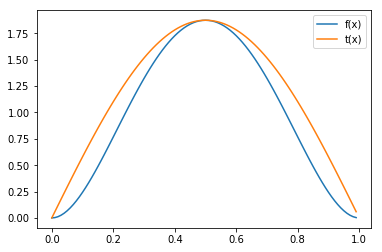

In [124]:
# Ilustración de las dos funciones 
# Función objetivo
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

#### 2

$t(x)=1.875\sin(\pi x)$

$c=\int_{-\infty}^{\infty}t(x)$

$g(x)= \frac{t(x)}{c}$

Planteamos $g(x)$ de la siguiente manera, observando que los 1.875 se convertirán en 1.

$$g(x)= \frac{1.875\sin(\pi x)}{1.875\int_{-\infty}^{\infty}\sin(\pi x)} =$$

$$ \frac{\sin(\pi x)}{\int_{-\infty}^{\infty}\sin(\pi x)}=$$

Si lo dejamos de ${-\infty}$ a ${\infty}$ diverge. Sin embargo, si lo acotamos de 0 a 1 (como en la gráfica) obtenemos:

$$ \frac{\sin(\pi x)}{\int_{0}^{1}\sin(\pi x)} =$$

$$ \frac{\sin(\pi x)}{\frac{2}{\pi}} =$$

<font color=red> $$g(x)= \frac{\pi\sin(\pi x)}{2}$$ </font>

Ahora se integra de ${-\infty}$ a $x$ para obtener $G(x)$

$$G(x)=\int_{-\infty}^{x}\frac{\pi\sin(\pi x)}{2}=$$

Como sabemos que esta integral diverge, la acotamos de $0$ a $x$, puesto que de ${-\infty}$ a 0 vale 0.

$$\int_{0}^{x}\frac{\pi\sin(\pi x)}{2}=$$

Obtenemos el siguiente resultado

<font color=red>  $$G(x) = \frac{1}{2}(-\cos(\pi x)+1)$$ </font>

#### 3

In [111]:
#Definimos la transformada
def GX(N):
    return np.arccos(1-2*np.random.random(N))/np.pi

In [112]:
N = 10**4
y= np.arange(0,N,0.01)
deriv= (np.pi/2)*np.sin(np.pi*y)
x2 = GX(N)
x2 = x2[~np.isnan(x2)]

#### 4

0.5000952513529191


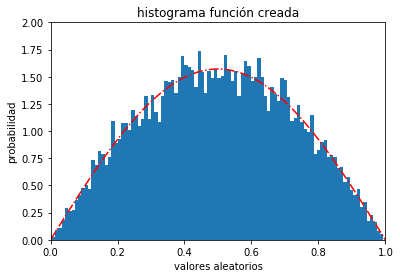

In [116]:
plt.plot(y,deriv, 'r-.')
plt.axis([0,1,0,2])
plt.hist(x2,bins=100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función creada')
print(np.mean(x2))

plt.show()

#### 5

In [120]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


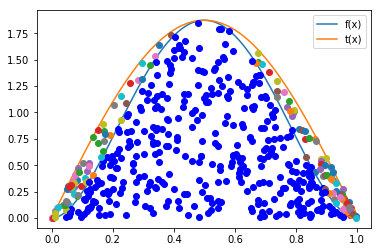

In [137]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) senoidal

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

#### 6

El máximo de f es: [1.875]


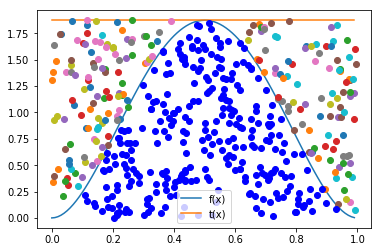

In [138]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.ones(len(x)) # función constante
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

In [176]:
# Definimos la función para que nos diga el porcentaje de aceptadas en ambos casos
def PorcentajeAceptadas(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    aceprech= [1 if condition[k] else 0 for k in range(len(R1))]
    porcentaje= (np.sum(aceprech)/len(R1))*100
    return porcentaje

In [179]:
# Método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.ones(len(x)) # función constante
# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

constante= PorcentajeAceptadas(R2,R1,f,t)
constante

52.400000000000006

In [180]:
# Método de aceptación y rechazo cuando se toma t(x) senoidal

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.sin(np.pi*x)

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

senoidal= PorcentajeAceptadas(R2,R1,f,t)
senoidal

69.6

In [189]:
print('El porcentaje aproximados de puntos de aceptación cuando se toma t(x) como constante es', str(constante.round(2))+str('%'))
print('El porcentaje aproximado de puntos de aceptación cuando se toma t(x) como senoidal es', str(senoidal.round(2))+str('%'))

El porcentaje aproximados de puntos de aceptación cuando se toma t(x) como constante es 52.4%
El porcentaje aproximado de puntos de aceptación cuando se toma t(x) como senoidal es 69.6%


#### Conclusiones

- Desde la gráfica se puede observar claramente el hecho de que cuando utilizamos $t(x)$ constante obtenemos un porcentaje menor de aceptación que cuando usamos $t(x)$ senoidal. Esto definitivamente se debe a que el espacio que queda entre $t(x)$ y $f(x)$ es mucho mayor en el primer caso que en el segundo, lo que da lugar a que más "rechazados" tengan espacio para entrar.

- Podríamos decir que si queremos aproximarnos más a la aceptación de nuestro experimento es mejor utilizar una función senoidal correspondiente como hicimos en el ejercio pasado.

#### 7

El máximo de f es: [2.109375]


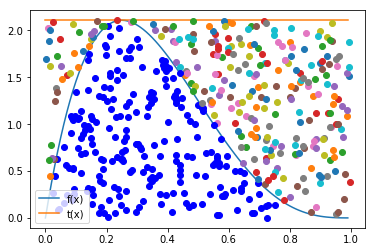

In [190]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x: 20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.ones(len(x)) # función constante
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)